In [5]:
import numpy as np
import pandas as pd
import datetime
import re
import string
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation


# nltk
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.chunk import ne_chunk

from nltk.stem.snowball import SnowballStemmer

import spacy
from spacy import displacy
from textblob import TextBlob
import pickle
from wordcloud import WordCloud

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. EDA & Preprocessing

- #### EDA

In [6]:
raw_tweet_df = pd.read_pickle("raw_tweet_pickle.pkl")
raw_tweet_df.head(5)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username,likeCount,retweetCount,lang,date,time,month,year,period
0,2020-01-30 23:59:33+00:00,1223033038013181953,"@RinAldrin not to play devil's advocate, but t...",DialD4Death,0,0,en,2020-01-30,23:59:33,01,20,20-01
1,2020-01-30 23:59:29+00:00,1223033020254474241,The oldest idea in economics is still the best...,TaxLandNotMan,3,2,en,2020-01-30,23:59:29,01,20,20-01
2,2020-01-30 23:58:56+00:00,1223032881255047168,Today's LS Desk @ Global Commns.\n・14-16: Inag...,LS_OUMainLib,0,0,en,2020-01-30,23:58:56,01,20,20-01
3,2020-01-30 23:58:07+00:00,1223032676225101826,@inthezoneuk @bbcquestiontime 2018 Whitehall r...,christo_lane,0,0,en,2020-01-30,23:58:07,01,20,20-01
4,2020-01-30 23:57:56+00:00,1223032631190683650,Absolutely me doing 'sudden research' before g...,irenikae,0,0,en,2020-01-30,23:57:56,01,20,20-01


In [7]:
raw_tweet_df.shape

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(69060, 12)

In [8]:
raw_tweet_df.head(5)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username,likeCount,retweetCount,lang,date,time,month,year,period
0,2020-01-30 23:59:33+00:00,1223033038013181953,"@RinAldrin not to play devil's advocate, but t...",DialD4Death,0,0,en,2020-01-30,23:59:33,01,20,20-01
1,2020-01-30 23:59:29+00:00,1223033020254474241,The oldest idea in economics is still the best...,TaxLandNotMan,3,2,en,2020-01-30,23:59:29,01,20,20-01
2,2020-01-30 23:58:56+00:00,1223032881255047168,Today's LS Desk @ Global Commns.\n・14-16: Inag...,LS_OUMainLib,0,0,en,2020-01-30,23:58:56,01,20,20-01
3,2020-01-30 23:58:07+00:00,1223032676225101826,@inthezoneuk @bbcquestiontime 2018 Whitehall r...,christo_lane,0,0,en,2020-01-30,23:58:07,01,20,20-01
4,2020-01-30 23:57:56+00:00,1223032631190683650,Absolutely me doing 'sudden research' before g...,irenikae,0,0,en,2020-01-30,23:57:56,01,20,20-01


In [9]:
raw_tweet_df.dtypes

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Datetime        datetime64[ns, UTC]
Tweet Id                      int64
Text                         object
Username                     object
likeCount                     int64
retweetCount                  int64
lang                         object
date                         object
time                         object
month                        object
year                         object
period                       object
dtype: object

In [10]:
raw_tweet_df.isna().sum()

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Datetime        0
Tweet Id        0
Text            0
Username        0
likeCount       0
retweetCount    0
lang            0
date            0
time            0
month           0
year            0
period          0
dtype: int64

In [11]:
raw_tweet_df[['year','month']].value_counts().sort_values()

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year  month
20    05       3017
      12       3024
      09       3063
21    10       3072
20    04       3088
      01       3090
      07       3096
      02       3102
      06       3108
      11       3123
21    04       3131
      01       3137
20    08       3163
      10       3180
      03       3247
21    09       3498
      05       3644
      08       3652
      07       3819
      03       3892
      06       3914
dtype: int64

> select en only, reduce 84050 rows to 69060 rows

- #### Text Preprocessing

In [12]:
class TweetAnalyzer():
    
    def __init__(self, raw_tweet_df):
        self.raw_tweet_df = raw_tweet_df
               
        
    def clean_tweet(self, text):
     # removing unwanted digits ,special chracters from the text

        #url_regex = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
        #handle_regex= "^@?(\w){1,15}$"
        text = text.lower()
        text= ' '.join(re.sub('\w+\s@\w+:+', ' ', text).split())
        text= ' '.join(re.sub('@\w+:+', ' ', text).split())
        #text= ' '.join(re.sub("(@[A-Za-z0-9]+)", " ", text).split()) #tags
        text= ' '.join(re.sub("^@?(\w){1,15}$", " ", text).split())
        text= ' '.join(re.sub("(\w+:\/\/\S+)", " ", text).split())   #Links
        text= ' '.join(re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"," ", text).split()) 
        text= re.sub(r'<[^<]+?>', '', text)  #xml format
        text= text.replace('\n', ' ') # newline
        text= re.sub(r'\s+', ' ', text) # spaces
        text= re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
        text= re.sub('\w*\d\w*', ' ', text)
        text= ' '.join(re.sub(r'www\S+', '',text).split())
        text= ' '.join(re.sub("\s+", " ",text).split()) #Extrem white Space
        text= ' '.join(re.sub("[^-9A-Za-z ]", "" ,text).split()) #digits 
        text= ' '.join(re.sub('-', ' ', text).split()) 
        text= ' '.join(re.sub('_', ' ', text).split()) #underscore 
        RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
        text = RE_EMOJI.sub(r'', text)
        return text
    
    def tweet_docs_tokens(self):
        self.raw_tweet_df['cleaned_text']=[ self.clean_tweet(x) for x in self.raw_tweet_df.Text]
        self.raw_tweet_df['token'] =[TextBlob(x).words for x in self.raw_tweet_df.cleaned_text]
        
        # try spacy
        docs = list(nlp.pipe(self.raw_tweet_df.cleaned_text))
        self.raw_tweet_df['spacy_doc'] = docs
        docs_clean = [[w.lemma_.lower() for w in doc if (not w.is_stop and not w.is_punct and not w.like_num and not w.is_space and not len(w)==1) \
                       or (w.lemma_=='not')] for doc in docs]
        self.raw_tweet_df['docs_clean'] = docs_clean
        
            
    def get_raw_tweets():
        return self.raw_tweet_df
    
    def get_popular_tweets(self, likeCnt=2):
        popular_tweet_df = self.raw_tweet_df[raw_tweet_df.likeCount > 2]
        return popular_tweet_df
    
    def pickle_tweets(self, tweets_df, filename):
        outfile = open(filename,'wb')
        pickle.dump(tweets_df,outfile)
        outfile.close()

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:13: DeprecationWarning: invalid escape sequence \w
<>:14: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \w
<>:18: DeprecationWarning: invalid escape sequence \(
<>:23: DeprecationWarning: invalid escape sequence \w
<>:25: DeprecationWarning: invalid escape sequence \s
<>:13: DeprecationWarning: invalid escape sequence \w
<>:14: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \w
<>:18: DeprecationWarning: inval

In [428]:
if __name__ == '__main__':
    tweet_analyzere = TweetAnalyzer(raw_tweet_df)
    tweet_analyzere.tweet_docs_tokens()

In [16]:
popular_tweet_df = pd.read_pickle("popular_tweet_df.pkl")
popular_tweet_df.shape

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10885, 16)

In [13]:
popular_tweet_df = tweet_analyzere.get_popular_tweets(2)
popular_tweet_df.shape

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'tweet_analyzere' is not defined

In [17]:
popular_tweet_df.head(5)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Datetime,Tweet Id,Text,Username,likeCount,retweetCount,lang,date,time,month,year,period,cleaned_text,token,spacy_doc,docs_clean
1,2020-01-30 23:59:29+00:00,1223033020254474241,The oldest idea in economics is still the best...,TaxLandNotMan,3,2,en,2020-01-30,23:59:29,01,20,20-01,the oldest idea in economics is still the best...,"[the, oldest, idea, in, economics, is, still, ...","(the, oldest, idea, in, economics, is, still, ...","[old, idea, economic, good, need, idea, stop, ..."
15,2020-01-30 23:53:32+00:00,1223031521692528640,@rainaftersno @Shaker_aphra @BoobyJargon @dave...,AdamSchiavone,3,0,en,2020-01-30,23:53:32,01,20,20-01,rainaftersno shaker aphra boobyjargon daveweig...,"[rainaftersno, shaker, aphra, boobyjargon, dav...","(rainaftersno, shaker, aphra, boobyjargon, dav...","[rainaftersno, shaker, aphra, boobyjargon, dav..."
22,2020-01-30 23:51:42+00:00,1223031061090668544,@jwaterloo @AOC You mean apart from her actual...,JenkoMatty,8,0,en,2020-01-30,23:51:42,01,20,20-01,jwaterloo aoc you mean apart from her actual d...,"[jwaterloo, aoc, you, mean, apart, from, her, ...","(jwaterloo, aoc, you, mean, apart, from, her, ...","[jwaterloo, aoc, mean, apart, actual, degree, ..."
23,2020-01-30 23:51:13+00:00,1223030940282343425,"Messy thread on William Alonso, disciplinary b...",Undercoverhist,4,2,en,2020-01-30,23:51:13,01,20,20-01,messy thread on william alonso disciplinary bo...,"[messy, thread, on, william, alonso, disciplin...","(messy, thread, on, william, alonso, disciplin...","[messy, thread, william, alonso, disciplinary,..."
33,2020-01-30 23:49:07+00:00,1223030412907372544,We are learning about supply and demand by sim...,MsJohnsonLCE,6,2,en,2020-01-30,23:49:07,01,20,20-01,we are learning about supply and demand by sim...,"[we, are, learning, about, supply, and, demand...","(we, are, learning, about, supply, and, demand...","[learn, supply, demand, simulate, free, market..."


#### Pickle the tweets - raw tweet / popular tweet 

In [443]:
tweet_analyzere.pickle_tweets(popular_tweet_df , "popular_tweet_df.pkl")

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='period'>

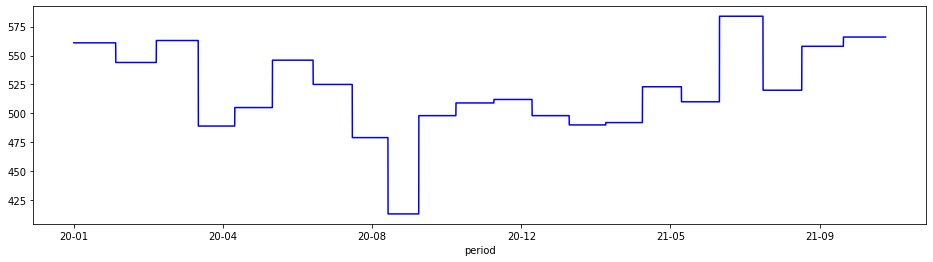

In [18]:
time_plt= pd.Series(data=popular_tweet_df.groupby(['period']).size(), 
                        index=popular_tweet_df['period'])
time_plt.plot(figsize=(16, 4), color='b')


 > 2020-01 - 2021-10: Trend of number of popular tweet ( with likeCount > 2)

#### Topic modeling

In [59]:
import pyLDAvis
import pyLDAvis.sklearn

class TweetTopModeling():
    
    def __init__(self, df):
        self.df = df
        self.stemmer = SnowballStemmer(language="english")
        self.stop_words = ENGLISH_STOP_WORDS.union(
            ['business', 'economic', 'finance','day','year','time','amp', 'nt','ll', 'say', 'let', 'etc', 've', 'ur', 'ya', 'lol'])
        vc = self.tweetVectorizer()
        self.corpus = self.df.docs_clean
        self.tweet_word_matrix = []
        self.tweet_topic_matrix = []
        self.tweet_topic_matrix_df = []
        self.lda_tweet_topic_matrix = []
        self.lda_tweet_topic_matrix_df =[]
        
    def prep(self, word):
        if word.lower() in self.stop_words:
            return None

        elif self.stemmer is None:
            return word.lower()

        else:
            return self.stemmer.stem(word)
    

    def tweetVectorizer(self):
        self.vc = TfidfVectorizer(stop_words=self.stop_words,
                             ngram_range=(1,1),
                          min_df= 10 ,  # This is default; this is just a reminder it exists
                          max_df= 0.5)

        
    def df_to_lda_model(self, num_of_topics, model='tfidf'):
        docs_list_clean = [' '.join(doc) for doc in self.corpus]
        tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = self.stop_words, #'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.9, 
                                min_df = 10)
        dtm_tf = tf_vectorizer.fit_transform(docs_list_clean)
        dtm = dtm_tf
        tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
        dtm_tfidf = tfidf_vectorizer.fit_transform(docs_list_clean)
        lda_tf = LatentDirichletAllocation(n_components=num_of_topics, random_state=0)
        if model == 'tfidf':
        # Fit the Latent Dirichlet Allocation models for TFIDF DTM
            lda_tf.fit(dtm_tfidf)
            dtm = dtm_tfidf
        elif model == 'tf': 
            lda_tf.fit(dtm_tf)
            dtm = dtm_tf
        
        self.lda_tweet_topic_matrix = lda_tf.fit_transform(dtm_tf)
        print(self.lda_tweet_topic_matrix.shape)
        self.get_lda_tweet_topic()
        print(self.lda_tweet_topic_matrix_df.shape)
        self.display_topics(lda_tf, tf_vectorizer.get_feature_names(), 10)
        
        return lda_tf, dtm, tf_vectorizer
        
    def get_lda_tweet_topic(self):
        self.lda_tweet_topic_matrix_df = pd.DataFrame(self.lda_tweet_topic_matrix).add_prefix('topic_')
        self.lda_tweet_topic_matrix_df[['raw_tweets', 'clean_tweets', 'docs_clean', 'likeCount', 'period']]  = self.df[['Text', 'cleaned_text', 'docs_clean', 'likeCount', 'period']]
        self.lda_tweet_topic_matrix_df = self.lda_tweet_topic_matrix_df.dropna(axis=0)
        return self.lda_tweet_topic_matrix_df
    
    def df_to_nmf_topics(self, num_of_topics, no_top_words):
        docs_list_clean = [' '.join(doc) for doc in self.corpus]
        self.tweet_word_matrix = self.vc.fit_transform(docs_list_clean)
        
        nmf_model = NMF(num_of_topics)
        self.tweet_topic_matrix = nmf_model.fit_transform(self.tweet_word_matrix)
        self.display_topics(nmf_model, self.vc.get_feature_names(), no_top_words)
    
    def get_lda_tweet_topic_matrix(self):
        return self.lda_tweet_topic_matrix
    
    def get_tweet_topic_df(self):
        self.tweet_topic_matrix_df = pd.DataFrame(self.tweet_topic_matrix).add_prefix('topic_')
        self.tweet_topic_matrix_df[['raw_tweets', 'clean_tweets', 'docs_clean', 'likeCount', 'period']]  = self.df[['Text', 'cleaned_text', 'docs_clean', 'likeCount', 'period']]
        self.tweet_topic_matrix_df = self.tweet_topic_matrix_df.dropna(axis=0)
        print(self.tweet_topic_matrix_df.shape)
        return self.tweet_topic_matrix_df
    
    def get_top_tweets(self, topic, no_top_tweets, model='lda'):
        top_tweets_list = []
        if model == 'nmf':
            self.get_tweet_topic_df()
            for tweet in self.tweet_topic_matrix_df.sort_values(topic, ascending=False)['docs_clean'].values:
                top_tweets_list.append(tweet)
        else:
            for tweet in self.lda_tweet_topic_matrix_df.sort_values(topic, ascending=False)['docs_clean'].values:
                top_tweets_list.append(tweet)
        return top_tweets_list

    
    def display_topics(self, model, feature_names, no_top_words, topic_names=None):
        for ix, topic in enumerate(model.components_):
            if not topic_names or not topic_names[ix]:
                print("\nTopic ", ix)
            else:
                print("\nTopic: '",topic_names[ix],"'")
            print(", ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]]))
    
    def textacy_topic_plot(self):
        model = tm.TopicModel('nmf', n_topics=30)
        model.fit(self.tweet_word_matrix)
        textacy_doc_topic_matrix = model.transform(self.tweet_word_matrix)
        model.termite_plot(self.tweet_word_matrix, self.vc.get_feature_names(), topics=-1,  n_terms=30, sort_terms_by='seriation') 
 

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
popular_tweet_df['Polarity'] =[ getPolarity(' '.join(x)) for x in popular_tweet_df.docs_clean]

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
#popular_tweet_df group by month
sentiment_per_day = popular_tweet_df.groupby(popular_tweet_df.period)['Polarity'].mean()
df1 = pd.DataFrame(data=sentiment_per_day.values, columns=['Polarity'], index=sentiment_per_day.index)

df2 = pd.DataFrame([ 8997, 8454, 8988, 9560, 10147, 10890, 12114, 11407, 11046, 12885, 12911, 12911, 13089, 13850, 13686, 14549, 14955, 14682, 15838, 16022, 16022], columns=["price"]).set_index(sentiment_per_day.index)
#df2
df= pd.concat([df1, df2], axis=1)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


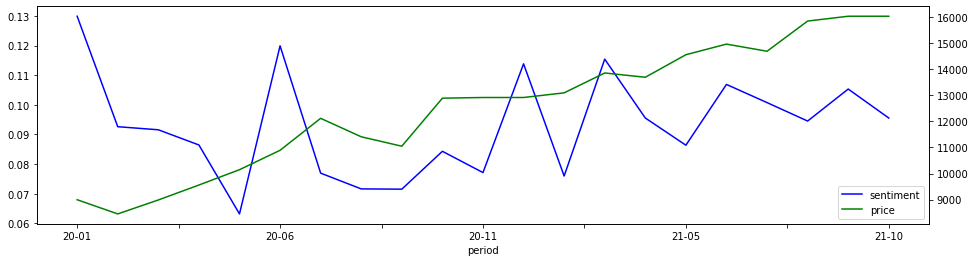

<Figure size 1152x288 with 0 Axes>

In [130]:
plt.figure(figsize=(16,4))
ax1 = df.Polarity.plot(color='blue', label='sentiment')
ax2 = df.price.plot(color='green', secondary_y=True, label='price')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=4)
plt.figure(figsize=(16,4))
plt.show();

### NMF Top Modeling

#### Top topics

In [64]:
tweet_top_modeling = TweetTopModeling(popular_tweet_df)
nmf_model = tweet_top_modeling.df_to_nmf_topics(15, 12)
#nmf_model, tweet_topic_matrix = df_to_nmf_topics(popular_tweet_df, 20, 15)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
mind, damn, fucking, literally, yo, come, pay, thing, cause, sit, love, bitch

Topic  1
people, money, tell, care, white, black, thing, actually, don, rich, stop, hate

Topic  2
trickle, rich, believe, biden, reagan, tax, republican, middle, money, cut, fail, wealthy

Topic  3
good, love, friend, feel, thing, hard, look, yes, tell, job, deal, pretty

Topic  4
like, look, feel, sound, real, tell, guy, shit, cause, believe, ppl, love

Topic  5
economics, class, degree, school, home, tell, student, high, middle, study, aoc, major

Topic  6
know, don, mean, government, person, shit, tell, guy, actually, run, drop, yes

Topic  7
small, support, owner, black, local, help, love, shop, crnc, thank, today, customer

Topic  8
work, pay, hard, way, tax, idea, lot, grow, yeah, hour, home, end

Topic  9
gold, silver, metal, mining, invest, kitconew, kitconews, investing, price, market, high, stock

Topic  10
understand, don, basic, study, doesn, demand, socialist, thing, hard, supply, win

### LDA model - pyLDAvis

#### tfidf LDA

In [65]:
lda_tfidf, dtm_tf, tf_vectorizer = tweet_top_modeling.df_to_lda_model(15)
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tf, tf_vectorizer)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


(10885, 15)
(1662, 20)

Topic  0
great, research, paper, economics, health, education, politic, new, write, study

Topic  1
man, know, big, person, white, life, like, right, people, think

Topic  2
support, people, small, owner, like, come, local, know, plan, market

Topic  3
live, small, technology, join, health, change, care, tonight, economics, family

Topic  4
student, school, science, professor, university, college, economics, follow, thank, group

Topic  5
financ, public, supply, demand, market, free, believe, buy, law, cat

Topic  6
mind, people, tell, like, woman, talk, think, twitter, shit, damn

Topic  7
like, people, black, think, feel, price, good, support, look, wage

Topic  8
trump, covid, economy, china, coronavirus, new, pandemic, country, impact, change

Topic  9
work, people, good, need, actually, pay, doesn, know, problem, like

Topic  10
start, gold, new, invest, study, stock, learn, high, silver, book

Topic  11
trickle, work, rich, class, tax, poor, cut, people, m

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12     0.150576 -0.077239       1        1  7.710904
6      0.187503 -0.129370       2        1  7.240291
2      0.062355  0.016388       3        1  7.198693
9      0.074683  0.041494       4        1  7.145913
4     -0.133004 -0.110316       5        1  7.116079
0     -0.202781 -0.067183       6        1  6.849891
7      0.092766 -0.002044       7        1  6.801452
1      0.131400  0.019753       8        1  6.729634
11     0.088340  0.143477       9        1  6.554836
8     -0.123347  0.178490      10        1  6.477586
3     -0.080511  0.069485      11        1  6.333789
10    -0.137479 -0.145629      12        1  6.310216
13    -0.017769 -0.010794      13        1  5.976888
5     -0.050737  0.128794      14        1  5.943474
14    -0.041995 -0.055306      15        1  5.610355, topic_info=         Term        Freq       Total Category  logprob  loglift
1326     mind  188.000000  188.000000  Default  30.0000  30.0000
2089  trickle  156.000000  156.000000  Default  29.0000  29.0000
1478      pay  106.000000  106.000000  Default  28.0000  28.0000
1260      man   78.000000   78.000000  Default  27.0000  27.0000
2228     work  254.000000  254.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1482   people   21.367361  319.656758  Topic15  -4.3566   0.1752
2132      use   10.961576   56.541572  Topic15  -5.0241   1.2400
1912    start   12.860913  117.532959  Topic15  -4.8643   0.6680
1746    right    9.129625  103.148076  Topic15  -5.2069   0.4559
912      good    8.418751  205.860189  Topic15  -5.2880  -0.3162

[938 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         6  0.711406        aaea
0        11  0.284562        aaea
1         1  0.995038       aaron
6         5  0.154669  absolutely
6         7  0.670234  absolutely
...     ...       ...         ...
2252      6  0.061199     youtube
2252      7  0.061199     youtube
2252     11  0.673193     youtube
2252     13  0.122399     youtube
2255      6  0.746919        zoom

[2834 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 7, 3, 10, 5, 1, 8, 2, 12, 9, 4, 11, 14, 6, 15])

#### LDA tf 

In [66]:
lda_tf, dtm_tf, tf_vectorizer = tweet_top_modeling.df_to_lda_model(15,'tf')
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
    

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


(10885, 15)
(1662, 20)

Topic  0
great, research, paper, economics, health, education, politic, new, write, study

Topic  1
man, know, big, person, white, life, like, right, people, think

Topic  2
support, people, small, owner, like, come, local, know, plan, market

Topic  3
live, small, technology, join, health, change, care, tonight, economics, family

Topic  4
student, school, science, professor, university, college, economics, follow, thank, group

Topic  5
financ, public, supply, demand, market, free, believe, buy, law, cat

Topic  6
mind, people, tell, like, woman, talk, think, twitter, shit, damn

Topic  7
like, people, black, think, feel, price, good, support, look, wage

Topic  8
trump, covid, economy, china, coronavirus, new, pandemic, country, impact, change

Topic  9
work, people, good, need, actually, pay, doesn, know, problem, like

Topic  10
start, gold, new, invest, study, stock, learn, high, silver, book

Topic  11
trickle, work, rich, class, tax, poor, cut, people, m

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12     0.150576 -0.077239       1        1  7.781870
9      0.074683  0.041494       2        1  7.730986
2      0.062355  0.016388       3        1  7.284204
4     -0.133004 -0.110316       4        1  7.060375
6      0.187503 -0.129370       5        1  6.992086
7      0.092766 -0.002044       6        1  6.942307
0     -0.202781 -0.067183       7        1  6.905238
1      0.131400  0.019753       8        1  6.827516
11     0.088340  0.143477       9        1  6.659013
10    -0.137479 -0.145629      10        1  6.394651
8     -0.123347  0.178490      11        1  6.364947
13    -0.017769 -0.010794      12        1  6.160348
3     -0.080511  0.069485      13        1  5.921823
5     -0.050737  0.128794      14        1  5.757011
14    -0.041995 -0.055306      15        1  5.217625, topic_info=           Term        Freq        Total Category  logprob  loglift
1326       mind  614.000000   614.000000  Default  30.0000  30.0000
2089    trickle  537.000000   537.000000  Default  29.0000  29.0000
1478        pay  375.000000   375.000000  Default  28.0000  28.0000
1260        man  269.000000   269.000000  Default  27.0000  27.0000
646   economics  445.000000   445.000000  Default  26.0000  26.0000
...         ...         ...          ...      ...      ...      ...
1482     people   67.160635  1092.009963  Topic15  -4.3566   0.1644
2132        use   34.453782   190.538982  Topic15  -5.0241   1.2429
1912      start   40.423667   396.211576  Topic15  -4.8643   0.6706
1746      right   28.695701   348.576225  Topic15  -5.2069   0.4560
912        good   26.461325   708.121285  Topic15  -5.2880  -0.3338

[940 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         7  0.723310        aaea
0        13  0.255286        aaea
1         1  0.959005       aaron
6         4  0.150132  absolutely
6         6  0.660580  absolutely
...     ...       ...         ...
2252     12  0.113476     youtube
2252     13  0.680857     youtube
2255      1  0.073062        zoom
2255      6  0.073062        zoom
2255      7  0.803677        zoom

[3343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 10, 3, 5, 7, 8, 1, 2, 12, 11, 9, 14, 4, 6, 15])

### categories: topics#
* ' education.research.school.study': 4, 7, 10 
* ' politics.cornavirus.country' : 11
* ' wealth, work - 2, 9
* ' market, tax, goverment - 3
* ' talk.mindset' - 1, 5

#### Top Tweet per Topic 

In [104]:
topic_tweet

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,raw_tweets,clean_tweets,docs_clean,likeCount,period
1,0.003922,0.003922,0.003922,0.003922,0.132961,0.003922,0.003922,0.003922,0.003922,0.406375,0.003922,0.202090,0.003922,0.003922,0.215437,The oldest idea in economics is still the best...,the oldest idea in economics is still the best...,"[old, idea, economic, good, need, idea, stop, ...",3.0,20-01
15,0.844444,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,@rainaftersno @Shaker_aphra @BoobyJargon @dave...,rainaftersno shaker aphra boobyjargon daveweig...,"[rainaftersno, shaker, aphra, boobyjargon, dav...",3.0,20-01
22,0.102086,0.005128,0.160100,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.676275,0.005128,0.005128,0.005128,0.005128,@jwaterloo @AOC You mean apart from her actual...,jwaterloo aoc you mean apart from her actual d...,"[jwaterloo, aoc, mean, apart, actual, degree, ...",8.0,20-01
23,0.004762,0.004762,0.283443,0.004762,0.004762,0.004762,0.004762,0.004762,0.004762,0.441884,0.004762,0.127815,0.004762,0.004762,0.094478,"Messy thread on William Alonso, disciplinary b...",messy thread on william alonso disciplinary bo...,"[messy, thread, william, alonso, disciplinary,...",4.0,20-01
33,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.813333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,We are learning about supply and demand by sim...,we are learning about supply and demand by sim...,"[learn, supply, demand, simulate, free, market...",6.0,20-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10549,0.005556,0.005556,0.005556,0.005556,0.922222,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,0.005556,"Thanks, @CommBovo, for assembling the @MiamiCh...",thanks commbovo for assembling the miamichambe...,"[thank, commbovo, assemble, miamichamber, cham...",7.0,20-03
10562,0.022222,0.688888,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,Yes!!! Thanks for having me on!! Now let’s bea...,yes thanks for having me on now lets beat this...,"[yes, thank, have, lets, beat, nasty, virus, a...",5.0,20-03
10566,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844444,0.011111,0.011111,0.011111,0.011111,i just ordered takeout from our favorite sushi...,i just ordered takeout from our favorite sushi...,"[order, takeout, favorite, sushi, place, not, ...",9.0,20-03
10674,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766666,0.016667,0.016667,0.016667,0.016667,0.016667,"Queen Elizabeth, Prince Charles, PM Johnson an...",queen elizabeth prince charles pm johnson and ...,"[queen, elizabeth, prince, charles, pm, johnso...",6.0,20-03


In [306]:
topic_tweet = tweet_top_modeling.get_lda_tweet_topic()
topic11_tweet = topic_tweet[['topic_10', 'docs_clean', 'likeCount', 'period']]#.sort_values(by=['topic_10'], ascending=False)
topic11_tweet = topic11_tweet[topic11_tweet.topic_10 >= 0.6]
topic11_tweet['Polarity'] =[ getPolarity(' '.join(x)) for x in topic11_tweet.docs_clean]

topic5_tweet = topic_tweet[['topic_4', 'docs_clean', 'likeCount', 'period']]#.sort_values(by=['topic_4'], ascending=False)
topic5_tweet = topic5_tweet[topic5_tweet.topic_4 >= 0.6]
topic5_tweet['Polarity'] =[ getPolarity(' '.join(x)) for x in topic5_tweet.docs_clean]

topic4_tweet = topic_tweet[['topic_3', 'docs_clean', 'likeCount', 'period']]#.sort_values(by=['topic_3'], ascending=False)
topic4_tweet = topic4_tweet[topic4_tweet.topic_3 >= 0.6]
topic4_tweet['Polarity'] =[ getPolarity(' '.join(x)) for x in topic4_tweet.docs_clean]



/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [309]:
topic5_tweet.period

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


354      20-01
629      20-01
819      20-01
880      20-01
1077     20-01
1667     20-01
1756     20-01
1888     20-01
2294     20-01
2564     20-01
2780     20-01
2828     20-01
3808     20-02
4212     20-02
4379     20-02
4774     20-02
4775     20-02
4979     20-02
5114     20-02
5151     20-02
5172     20-02
6183     20-02
6209     20-02
6312     20-02
6333     20-02
6687     20-02
6721     20-02
7684     20-03
7788     20-03
7849     20-03
7855     20-03
8134     20-03
8268     20-03
8319     20-03
8360     20-03
8387     20-03
8612     20-03
8730     20-03
8843     20-03
8859     20-03
9132     20-03
9409     20-03
9432     20-03
9476     20-03
9575     20-03
9735     20-03
9825     20-03
9831     20-03
9874     20-03
9898     20-03
9906     20-03
10490    20-03
10549    20-03
Name: period, dtype: object

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


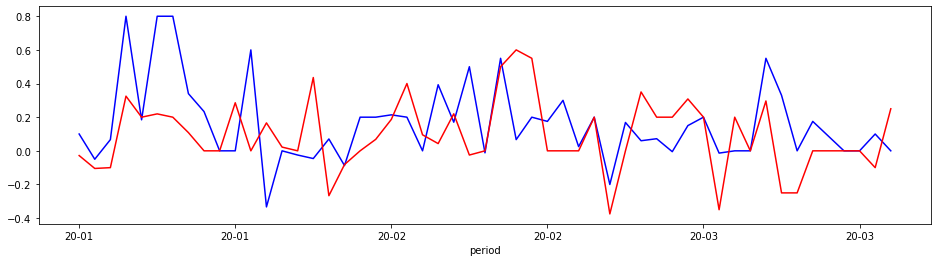

In [310]:
time_likes = pd.Series(data=topic5_tweet['Polarity'].values, index=topic5_tweet['period'])
time_likes.plot(figsize=(16, 4), color='b')

time_likes2 = pd.Series(data=topic11_tweet['Polarity'].values, index=topic11_tweet['period'])
time_likes2.plot(figsize=(16, 4), color='r')

plt.show()

In [205]:
def create_wordcloud(wordcloud_series):
    df_text = ' '.join(str(wordcloud_series).lower() for v in wordcloud_series)
    wordcloud = WordCloud(stopwords = None, random_state = 20, background_color = 'white',
                      collocations=True).generate(df_text)
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()
    plt.savefig('wordcloud.png')


/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
## tweets for top topics
topic_tweet = tweet_top_modeling.get_lda_tweet_topic()
topic11_tweet = topic_tweet[['topic_10', 'docs_clean', 'likeCount', 'period']].sort_values(by=['topic_10'], ascending=False)
topic11_tweet = topic11_tweet[topic11_tweet.topic_10 >= 0.3]
topic11_tweet['Polarity'] =[ getPolarity(' '.join(x)) for x in topic11_tweet.docs_clean]

topic5_tweet = topic_tweet[['topic_4', 'docs_clean', 'likeCount', 'period']].sort_values(by=['topic_4'], ascending=False)
topic5_tweet = topic5_tweet[topic5_tweet.topic_4 >= 0.8]
topic5_tweet['Polarity'] =[ getPolarity(' '.join(x)) for x in topic5_tweet.docs_clean]

topic4_tweet = topic_tweet[['topic_3', 'docs_clean', 'likeCount', 'period']].sort_values(by=['topic_3'], ascending=False)
topic4_tweet = topic4_tweet[topic4_tweet.topic_3 >= 0.8]
topic4_tweet['Polarity'] =[ getPolarity(' '.join(x)) for x in topic4_tweet.docs_clean]



/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


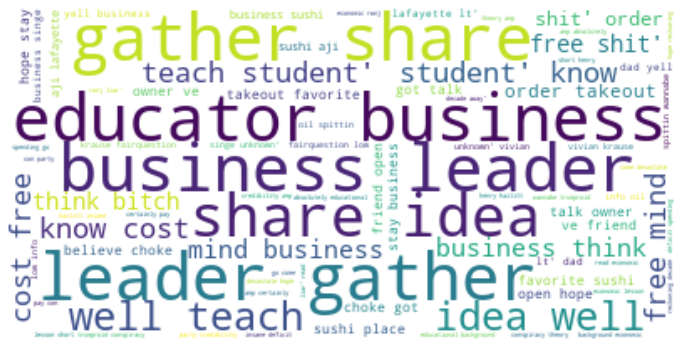

<Figure size 432x288 with 0 Axes>

In [268]:
#topic11_tweet_corpos = [' '.join(doc) for doc in topic11_tweet['docs_clean']]
tweet_corpos = set()
for c in [' '.join(doc) for doc in topic11_tweet['docs_clean']][:15]:
    tweet_corpos.add(c)

create_wordcloud(tweet_corpos)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


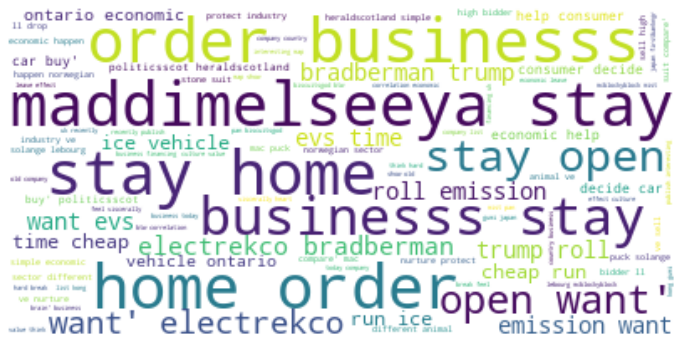

<Figure size 432x288 with 0 Axes>

In [269]:
tweet_corpos = set()
for c in [' '.join(doc) for doc in topic5_tweet['docs_clean']][:15]:
    tweet_corpos.add(c)

create_wordcloud(tweet_corpos)

/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennethhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


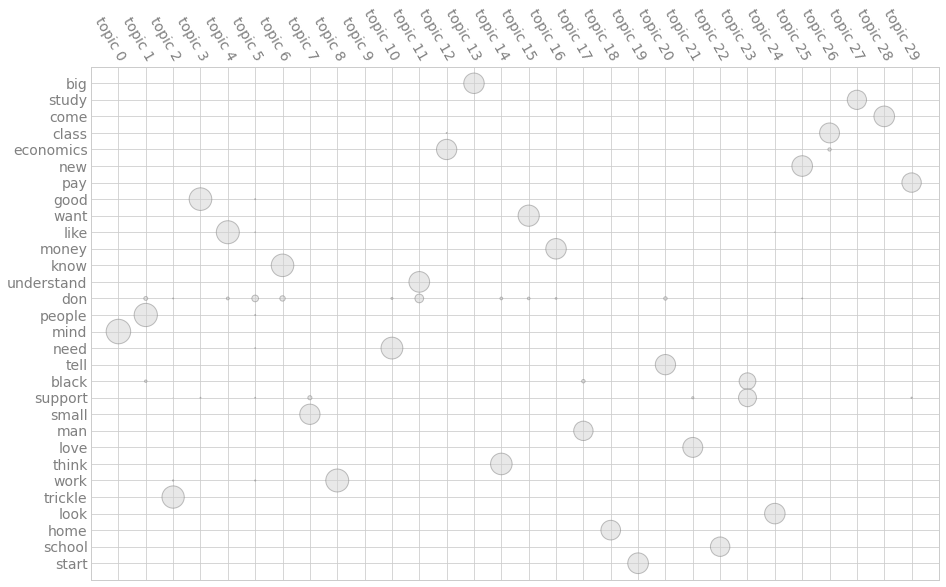

In [709]:
import textacy
from textacy import tm
#from textacy.vsm import Vectorizer

tweet_top_modeling.textacy_topic_plot()